In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [46]:
columns = ["latent_space_0","latent_space_1","latent_space_2","latent_space_3","latent_space_4",
           "latent_space_5","latent_space_6","anomaly"]
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/artifical_2_signals.csv", sep=";")
total = prediction_1[columns]

In [47]:
total.head()

,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4,latent_space_5,latent_space_6,anomaly
0,0.444841,-0.556853,0.240179,-0.281422,-0.414726,-0.235273,0.220986,0
1,0.126500,-0.446662,0.316357,-0.080894,-0.858233,-0.312968,0.147232,0
2,0.094590,-0.372622,0.281857,-0.011506,-0.808945,-0.373254,0.097531,0
3,0.057978,-0.276071,0.253816,-0.000141,-0.745135,-0.427654,0.068529,0
4,0.025026,-0.192565,0.209690,0.015146,-0.667188,-0.476022,0.048455,0


In [48]:
latent_space = total.iloc[:,0:7]

In [49]:
pca = PCA(n_components=7)
columns = []
for i in range(latent_space.shape[1]):
    columns.append("pc"+str(i))
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = total["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,anomaly
0,0.800065,0.048286,0.451834,0.270778,-0.085558,0.009283,-0.015601,0
1,0.755759,-0.061855,0.318371,-0.304387,-0.080378,-0.034960,0.038863,0
2,0.653028,-0.142825,0.283828,-0.306752,-0.063597,-0.009822,-0.003763,0
3,0.557907,-0.208961,0.217895,-0.273299,-0.060469,-0.021788,-0.023982,0
4,0.455297,-0.263736,0.162815,-0.226260,-0.051189,-0.019364,-0.037789,0


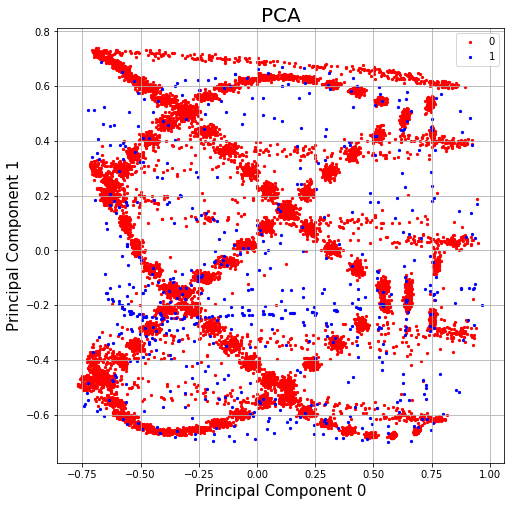

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc0']
               , finalDf.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [101]:
dataset_dbscan = finalDf.iloc[:,0:4]
dataset_dbscan.head()

,pc0,pc1,pc2,pc3
0,0.800065,0.048286,0.451834,0.270778
1,0.755759,-0.061855,0.318371,-0.304387
2,0.653028,-0.142825,0.283828,-0.306752
3,0.557907,-0.208961,0.217895,-0.273299
4,0.455297,-0.263736,0.162815,-0.226260


## Distance Measurements

In [108]:
clustering = DBSCAN(eps=0.05, min_samples=10).fit(dataset_dbscan)

In [109]:
analysis_db = dataset_dbscan

In [110]:
labels_cluster = clustering.labels_
analysis_db["cluster labels"] = clustering.labels_
analysis_db.head()

,pc0,pc1,pc2,pc3,cluster labels
0,0.800065,0.048286,0.451834,0.270778,17
1,0.755759,-0.061855,0.318371,-0.304387,0
2,0.653028,-0.142825,0.283828,-0.306752,1
3,0.557907,-0.208961,0.217895,-0.273299,2
4,0.455297,-0.263736,0.162815,-0.226260,3


In [111]:
dataset_dbscan["cluster labels"].value_counts()

 6     7989
-1     1033
 1      236
 2      234
 10     232
 9      231
 16     135
 7      123
 3      123
 4      119
 15     116
 11     116
 12     115
 8      115
 0      115
 13     115
 14     114
 5      113
 18     106
 17      98
 21      85
 20      82
 30      25
 22      23
 25      18
 26      16
 27      12
 19      11
 31      11
 28      10
 23      10
 29      10
 24       9
Name: cluster labels, dtype: int64

In [112]:
finalDf = dataset_dbscan

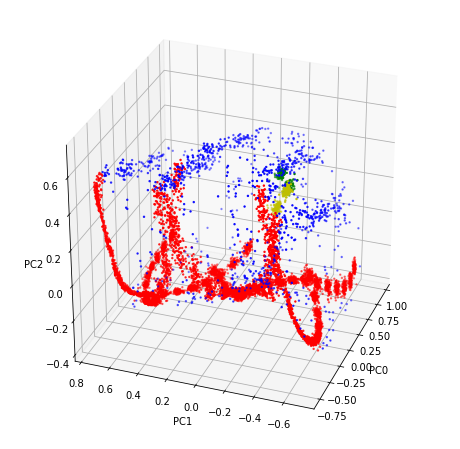

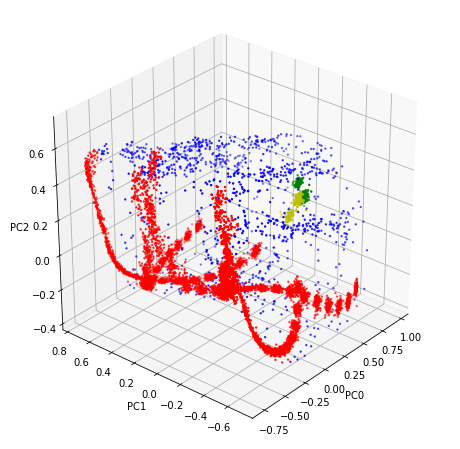

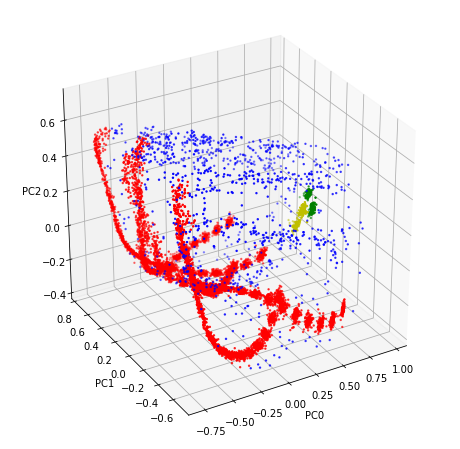

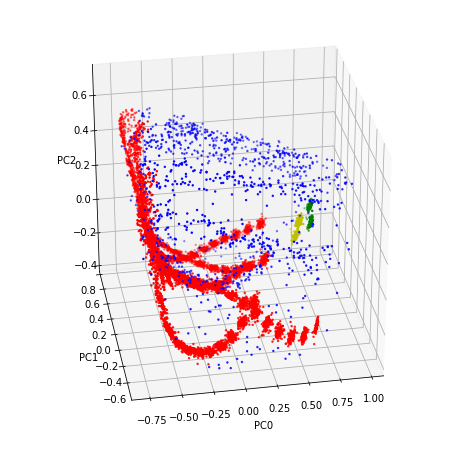

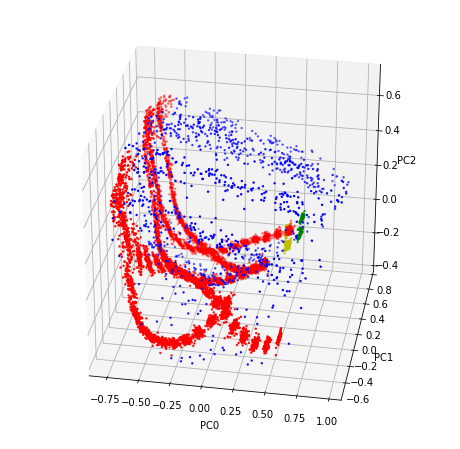

In [114]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [6, -1, 1, 2]
    colors = ['r','b','g','y']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['cluster labels'] == target
        xs = finalDf.loc[indicesToKeep, 'pc0']
        ys = finalDf.loc[indicesToKeep, 'pc1']
        zs = finalDf.loc[indicesToKeep, 'pc2']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC2')
    plt.show()